In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 12.5)
plt.rcParams['font.size'] = 25

##DVS with no external devices

###Plot of Q_cpu (part of energy equation) vs scaling factor


*   [Dyn Power Eq](https://drive.google.com/file/d/1fFq2FoIJSnYPZPbDRPe721ZSOzMUUqoQ/view?usp=share_link)
*   [Energy Eq](https://drive.google.com/file/d/1_PMrtG62fgW8NhBQJwcyubMii6HwfDno/view?usp=share_link)
*   [Q_cpu Eq](https://drive.google.com/file/d/1XBT7hpJs1-E398e6GwEbcfp8hWUOg7ww/view?usp=share_link)


In [ ]:
# approximate values for Intel Core i7-9700K 

P_dyn_1 = 125 # W dynamic power at max frequency
P_static = 75 # W static power (assumed to be constant)
P_cpu = P_dyn_1 + P_static # W CPU power

sf = np.arange(1,3.01,0.01) # scaling factor considered from 1 to 3; 1 representinf no scaling factor applied aka max frequency

In [ ]:
df_Qcpu = pd.DataFrame()
df_Qcpu['sf'] = sf
df_Qcpu['Q_dyn'] = P_dyn_1 * pow(sf,-2)
df_Qcpu['Q_static'] = P_static * sf
df_Qcpu['Q_cpu'] = df_Qcpu['Q_dyn'] + df_Qcpu['Q_static'] # can also be obtained by mutiplying 'sf' to the P_cpu
df_Qcpu['P_cpu'] = df_Qcpu['Q_cpu']/df_Qcpu['sf']

In [ ]:
display(df_Qcpu)

,sf,Q_dyn,Q_static,Q_cpu,P_cpu
0,1.00,125.000000,75.00,200.000000,200.000000
1,1.01,122.537006,75.75,198.287006,196.323768
2,1.02,120.146098,76.50,196.646098,192.790292
3,1.03,117.824489,77.25,195.074489,189.392707
4,1.04,115.569527,78.00,193.569527,186.124545
...,...,...,...,...,...
196,2.96,14.266801,222.00,236.266801,79.819865
197,2.97,14.170890,222.75,236.920890,79.771343
198,2.98,14.075943,223.50,237.575943,79.723471
199,2.99,13.981947,224.25,238.231947,79.676236


In [ ]:
Q_cpu_min_fig = df_Qcpu.Q_cpu.min()
sf_qmin_fig = df_Qcpu.sf.iloc[df_Qcpu['Q_cpu'].index[df_Qcpu['Q_cpu'] == Q_cpu_min_fig]]

In [ ]:
# fig1 = px.line(df_Qcpu, x = 'sf', y = ['Q_dyn','Q_static','Q_cpu'], title='Q_cpu(s) vs scaling factor')
# fig1.add_scatter(x = sf_qmin_fig, y = [Q_cpu_min_fig], mode = 'markers', marker=dict(color='RebeccaPurple',size=7.5), name = 'Q_cpu_min')
# fig1.show()

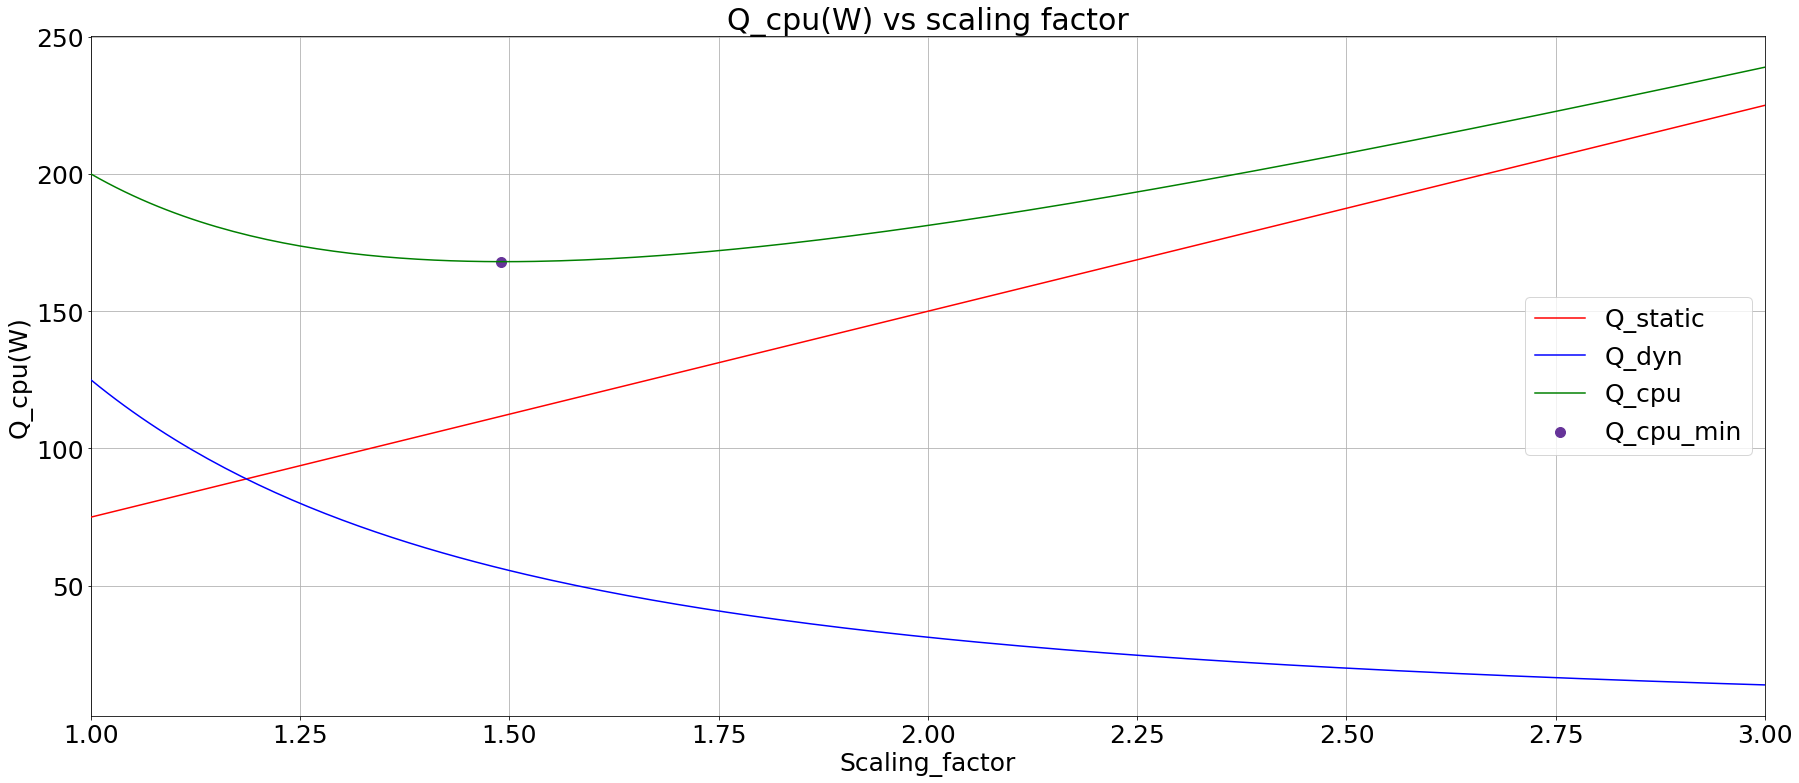

In [ ]:
fig1, ax1 = plt.subplots(1,1)
ax1.plot(df_Qcpu['sf'],df_Qcpu['Q_static'], label = 'Q_static',color = 'red', zorder = 3)
ax1.plot(df_Qcpu['sf'],df_Qcpu['Q_dyn'], label = 'Q_dyn',color = 'blue', zorder = 3)
ax1.plot(df_Qcpu['sf'],df_Qcpu['Q_cpu'], label = 'Q_cpu',color = 'green', zorder = 3)
ax1.scatter(sf_qmin_fig, Q_cpu_min_fig, label = 'Q_cpu_min',color = 'RebeccaPurple', s=100)
ax1.set(xlabel = 'Scaling_factor', ylabel = 'Q_cpu(W)',xlim = (1,3), title = 'Q_cpu(W) vs scaling factor')
ax1.legend(loc = 7)
ax1.grid(zorder=1)

To get the optimal scaling factor 

*   we can directly get it from the graph by finding the minimum value of Q_cpu and getting the corresponding frequency (Already shown in the graph)
*   By using the formula (derived from finding the min of the [Q_cpu Eq](https://drive.google.com/file/d/1XBT7hpJs1-E398e6GwEbcfp8hWUOg7ww/view?usp=share_link))



In [ ]:
#Formula
sf_eq = pow(((2*P_dyn_1)/P_static),1/3)
sf_eq = round(sf_eq,2)

In [ ]:
print('Optimal scaling factor = ',sf_eq)

Optimal scaling factor =  1.71


## Simple Scheduling algorithm

Tasks are considered to be periodic and the deadline is equal to its period.


In case of a predefined priority, Tasks are also given an option to use predefined priority order.

If priority numbers are not used then the order of tasks is defined by **Least Slack Time (LST)** If two  tasks have same LST then the priority is decided by predefined priority

**All times are in ms**

Least Slack Time (LST) is a scheduling algorithm that prioritizes tasks based on the amount of time remaining until their deadline. Tasks with the least amount of time remaining until their deadline are given priority over tasks with more time remaining. This algorithm is often used in real-time systems where deadlines are hard and inflexible.

### Simple LST

In [ ]:
import pandas as pd

# Create a DataFrame to store the tasks
tasks_df = pd.DataFrame(columns=["name", "release_time", "deadline", "wcet", "priority"])

# Add tasks to the DataFrame
tasks_df = tasks_df.append({"name": "A", "release_time": 0, "deadline": 10, "wcet": 3, "priority": 1}, ignore_index=True)
tasks_df = tasks_df.append({"name": "B", "release_time": 1, "deadline": 5, "wcet": 2, "priority": 2}, ignore_index=True)
tasks_df = tasks_df.append({"name": "C", "release_time": 2, "deadline": 8, "wcet": 4, "priority": 3}, ignore_index=True)
tasks_df = tasks_df.append({"name": "D", "release_time": 3, "deadline": 12, "wcet": 1, "priority": 4}, ignore_index=True)

# Get the current time
current_time = 0

# Calculate the slack time for each task
tasks_df["slack_time"] = tasks_df["deadline"] - current_time - tasks_df["wcet"]

# Sort the tasks by slack time and priority
tasks_df.sort_values(by=["slack_time", "priority"], ascending=[True, False], inplace=True)


In [ ]:
display(tasks_df)

,name,release_time,deadline,wcet,priority,slack_time
1,B,1,5,2,2,3
2,C,2,8,4,3,4
0,A,0,10,3,1,7
3,D,3,12,1,4,11


### Complex LST

[AET assumtion](https://drive.google.com/file/d/1yt283Hizdas8XDQ_pVr8tRD9ilhHsLef/view?usp=share_link)

In [ ]:
import pandas as pd

#Times are in s
# initialize task dataframe
df_tasks = pd.DataFrame({'Task': ["Task 1", "Task 2", "Task 3", "Task 4"],
                     'Deadline': [100, 50, 110, 70],
                     'WCET': [40, 45, 30, 20],
                     'Priority': [1, 2, 3, 4]})

df_tasks['AET'] = .75*df_tasks['WCET']

# schedule df_tasks
current_time = 0
schedule = []
start_time = []
end_time = []
while not df_tasks.empty:
    # update slack time for all df_tasks
    df_tasks['Slack Time'] = df_tasks['Deadline'] - (current_time + df_tasks['WCET'])
    # sort df_tasks based on LST and priority
    df_tasks = df_tasks.sort_values(by=['Slack Time', 'Priority'], ascending=[True, False])
    # select next task
    next_task = df_tasks.iloc[0]
    schedule.append(next_task)
    start_time.append(current_time)
    # update current time
    current_time += next_task['AET']
    # remove task from list of df_tasks
    df_tasks = df_tasks.drop(next_task.name)
    end_time.append(current_time)

# output scheduled df_tasks
df_sch_tasks = pd.DataFrame(schedule, columns = ['Task','Deadline','WCET','Priority','AET','Slack Time'])
df_sch_tasks['start_time'] = start_time
df_sch_tasks['end_time'] = end_time


In [ ]:
display(df_sch_tasks)

,Task,Deadline,WCET,Priority,AET,Slack Time,start_time,end_time
1,Task 2,50,45,2,33.75,5.00,0.00,33.75
3,Task 4,70,20,4,15.00,16.25,33.75,48.75
0,Task 1,100,40,1,30.00,11.25,48.75,78.75
2,Task 3,110,30,3,22.50,1.25,78.75,101.25


###DVS

In [ ]:
df_task_dvs = df_sch_tasks[['Task','Deadline','WCET','AET']]

In [ ]:
df_task_dvs['i_mu'] = 1/(df_task_dvs['WCET'].sum()/df_task_dvs['Deadline'].sum())

In [ ]:
# approximate values for Intel Core i7-9700K 

P_dyn_1 = 125 # W dynamic power at max frequency
P_static = 75 # W static power (assumed to be constant)
P_cpu = P_dyn_1 + P_static # W CPU power

In [ ]:
#Formula
sf_eq = pow(((2*P_dyn_1)/P_static),1/3)
sf_eq = round(sf_eq,2)
df_task_dvs['sf_eq'] = sf_eq

In [ ]:
df_task_dvs['sf_act'] = df_task_dvs[['i_mu','sf_eq']].min(axis=1)

In [ ]:
display(df_task_dvs)

,Task,Deadline,WCET,AET,i_mu,sf_eq,sf_act,E_cpu,E_cpu_DVS
1,Task 2,50,45,33.75,2.444444,1.49,1.49,6750.0,5671.814741
3,Task 4,70,20,15.00,2.444444,1.49,1.49,3000.0,2520.806552
0,Task 1,100,40,30.00,2.444444,1.49,1.49,6000.0,5041.613103
2,Task 3,110,30,22.50,2.444444,1.49,1.49,4500.0,3781.209827


In [ ]:
df_task_sf = df_task_dvs
df_task_sf['E_cpu'] = (P_dyn_1 + P_static)*df_task_sf['AET']
df_task_sf['E_cpu_DVS'] = (pow(df_task_sf['sf_act'],-2)*P_dyn_1+df_task_sf['sf_act']*P_static)*df_task_sf['AET']

In [ ]:
display(df_task_sf)

,Task,Deadline,WCET,AET,i_mu,sf_eq,sf_act,E_cpu,E_cpu_DVS
1,Task 2,50,45,33.75,2.444444,1.49,1.49,6750.0,5671.814741
3,Task 4,70,20,15.00,2.444444,1.49,1.49,3000.0,2520.806552
0,Task 1,100,40,30.00,2.444444,1.49,1.49,6000.0,5041.613103
2,Task 3,110,30,22.50,2.444444,1.49,1.49,4500.0,3781.209827


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 17.5)
plt.rcParams['font.size'] = 25

In [ ]:
#no dvs plot
start_time = df_sch_tasks['start_time'].to_numpy()
end_time = df_sch_tasks['end_time'].to_numpy()
freq = np.repeat(1,len(start_time))
widths = end_time - start_time
total_e_cpu = df_task_sf['E_cpu'].sum()

In [ ]:
#dvs plot
df_plot_dvs = pd.DataFrame()
df_plot_dvs['freq'] = 1/df_task_sf['sf_act']
df_plot_dvs['dvs_exet'] = df_task_sf['AET']*df_task_sf['sf_act']
df_plot_dvs['dvs_strat'] = df_plot_dvs['dvs_exet'].cumsum()-df_plot_dvs['dvs_exet']
total_e_cpu_dvs = df_task_sf['E_cpu_DVS'].sum()


In [ ]:
n = len(df_plot_dvs['dvs_exet'].to_numpy())

In [ ]:
display(df_plot_dvs)

,freq,dvs_exet,dvs_strat
1,0.671141,50.2875,0.0000
3,0.671141,22.3500,50.2875
0,0.671141,44.7000,72.6375
2,0.671141,33.5250,117.3375


In [ ]:
titles = df_task_sf.Task.to_list()
xmax = df_plot_dvs['dvs_exet'].sum()+10

ax1x = start_time.tolist()
ax1y = freq.tolist()
ax1w = widths.tolist()
ax1title = 'Task profile of non-DVS schedule (E=100%)'
ax1_color = [(r,r,r) for r in np.linspace(0, 1, len(widths))]

ax2x = df_plot_dvs['dvs_strat'].tolist()
ax2y = df_plot_dvs['freq'].tolist()
ax2w = df_plot_dvs['dvs_exet'].tolist()
ax2title = 'Task profile of DVS schedule (E='+ str(round((total_e_cpu_dvs/total_e_cpu*100),2)) +'%)'
ax2_color = [(r,r,r) for r in np.linspace(0, 1, len(widths))]

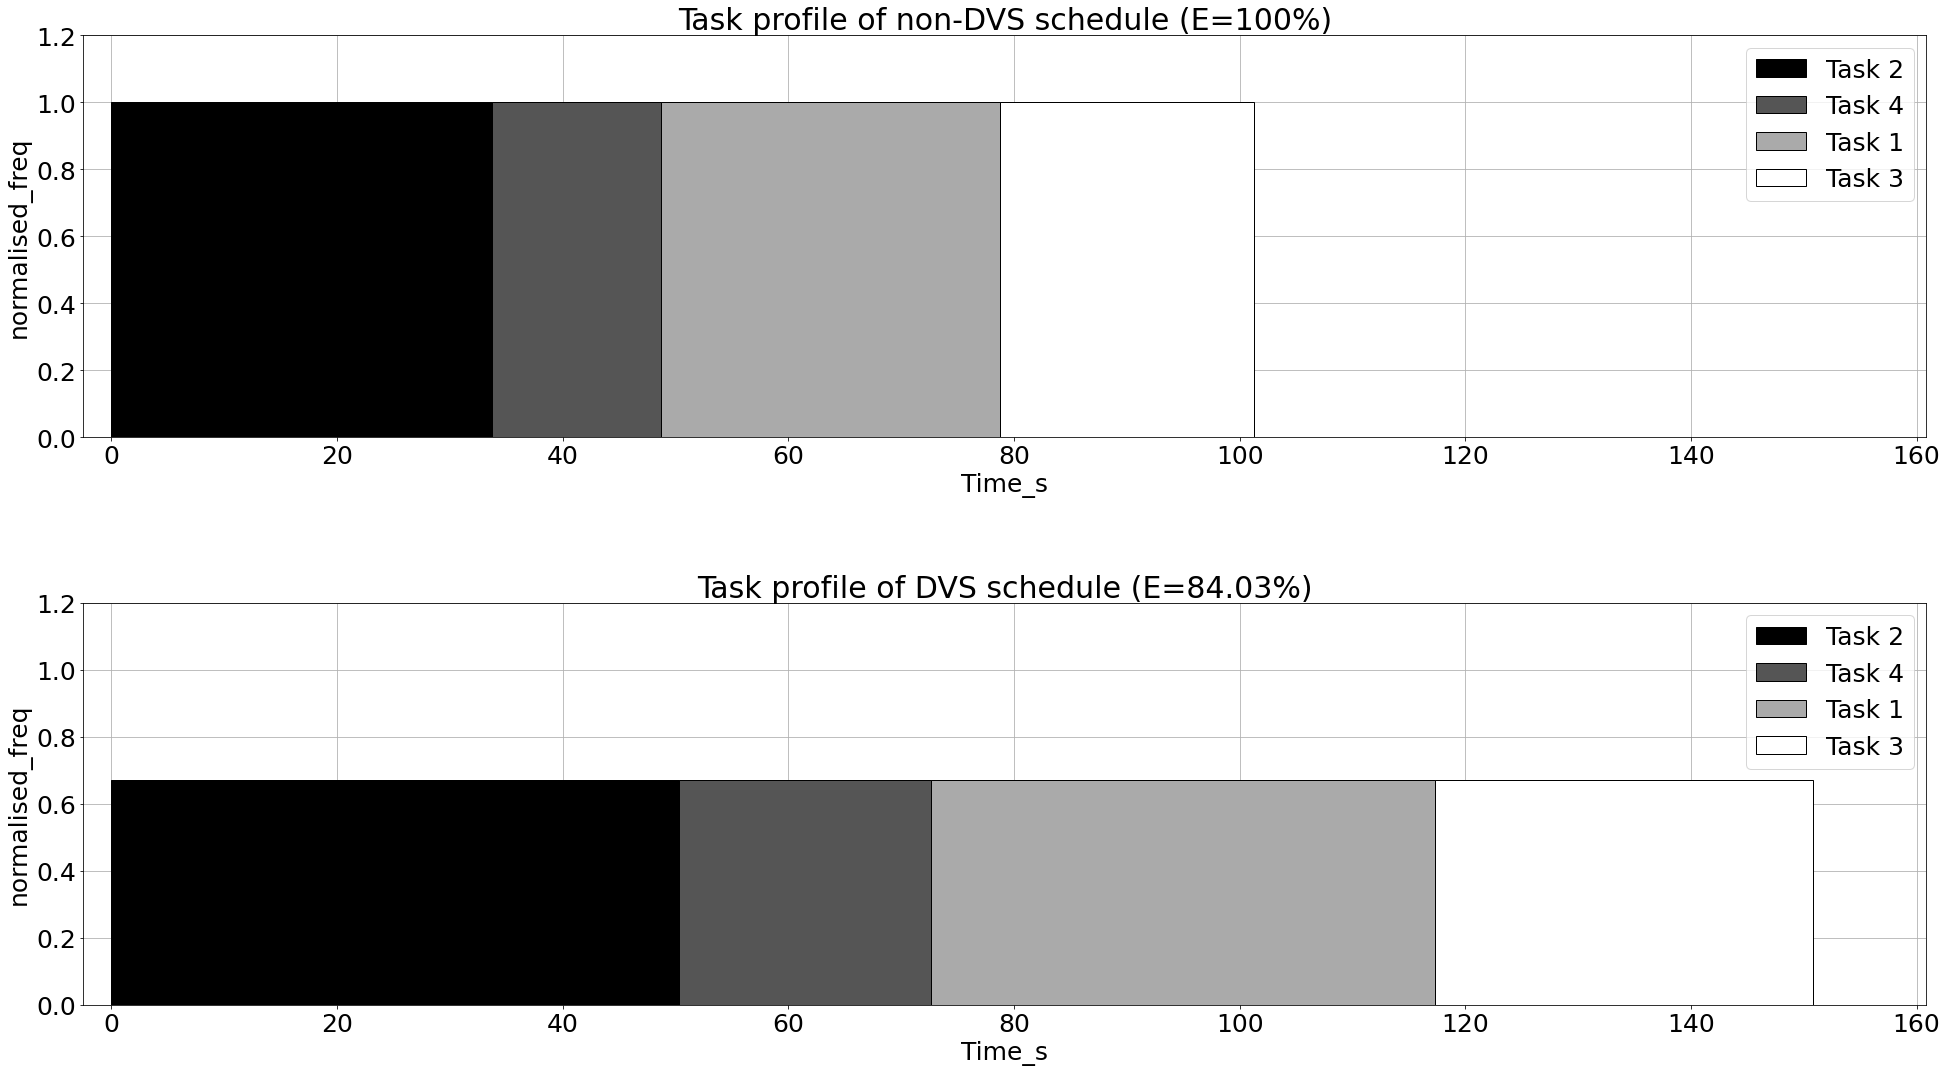

In [ ]:
fig, [ax1,ax2] = plt.subplots(2, 1)
fig.tight_layout(pad=5)
for i in range(len(ax1x)):
    ax1.bar(ax1x[i], ax1y[i], label=titles[i], align = 'edge', width = ax1w[i], color = ax1_color[i],edgecolor='k',zorder=3)
ax1.set(xlabel = 'Time_s', ylabel = 'normalised_freq',xlim = (-2.5,xmax), ylim = (0,1.2), title = ax1title)
for i in range(len(ax1x)):
    ax2.bar(ax2x[i], ax2y[i], label=titles[i], align = 'edge', width = ax2w[i], color = ax2_color[i],edgecolor='k',zorder=3)
ax2.set(xlabel = 'Time_s', ylabel = 'normalised_freq',xlim = (-2.5,xmax), ylim = (0,1.2), title = ax2title)
ax1.legend()
ax2.legend()
ax1.grid(zorder=0)
ax2.grid(zorder=0)